<div dir='rtl'>
به نام خدا

# پروژه یادگیری ماشین

فرشته فرقانی - ۹۶۱۰۲۱۰۴
<br>
مهسا دلیرروی فرد - ۹۶۱۰۵۷۳۴
<br>
الهه خدایی - ۹۶۱۱۰۲۰۴
</div>

<div dir='rtl'>
این لینک شامل فایل‌های نتایج تست و فیلم ضبط شده می‌باشد.
دسترسی این فولدر روی درایو باز شده ولی باز اگر مشکلی بود بگویید.<br> با تشکر
<div>

[ML_Project_Folder](https://drive.google.com/drive/folders/1NBrfYE5FaUgLVdgMMFGDGGahSm-ITPD_?usp=sharing)

# Mounting drive and imports

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# EDA



In [ ]:
train_data = pd.read_csv('/content/mydrive/MyDrive/ML_project/train_data.csv')
train_data.head()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
0,4706262,1578429005696,4,0,290,7855,6,10,6262,0,0,0,11,3543873,2688642,1
1,4706262,1578429005696,4,0,1386,7967,15,10,6262,0,0,0,11,3543873,2688642,0
2,4706262,1578429005696,4,0,378,1160,3610,10,6262,0,0,0,11,3543873,2688642,0
3,4706267,1578429007726,4,0,6642,804,3475,14,607,1,3,0,15,6245475,2688641,1
4,4706267,1578429007726,4,0,8414,6155,5271,14,607,1,3,0,15,6245475,2688641,0


<div dir='rtl'>
ابتدا تعداد ۰ و ۱ های لیبل را نمایش داده و نمودار آن را نیز کشیدیم.

0    2926235
1     842181
Name: clicked, dtype: int64


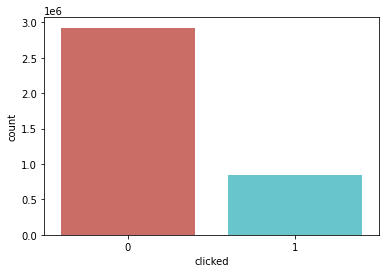

In [ ]:
import seaborn as sns

print(train_data['clicked'].value_counts())
sns.countplot(x='clicked',data=train_data, palette='hls')
plt.show();

<div dir='rtl'>
حال نمودار میله‌ای هر یک از گروه‌های لیبل را بر اساس ساعت روز می‌کشیم.

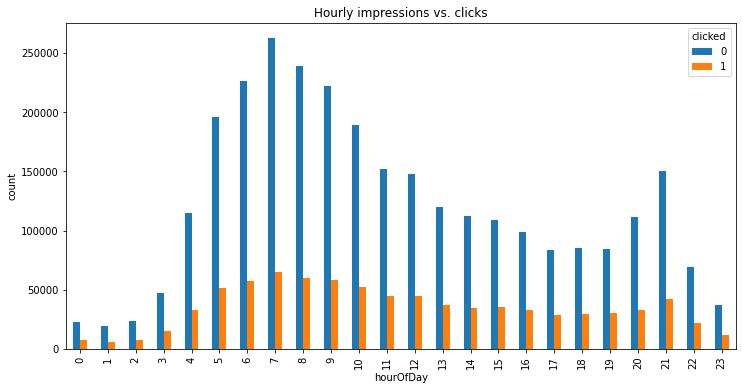

In [ ]:
train_data.groupby(['hourOfDay', 'clicked']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

<div dir='rtl'>
سپس نمودار میله‌ای هر یک از گروه‌های لیبل را بر اساس روزهای هفته می‌کشیم.

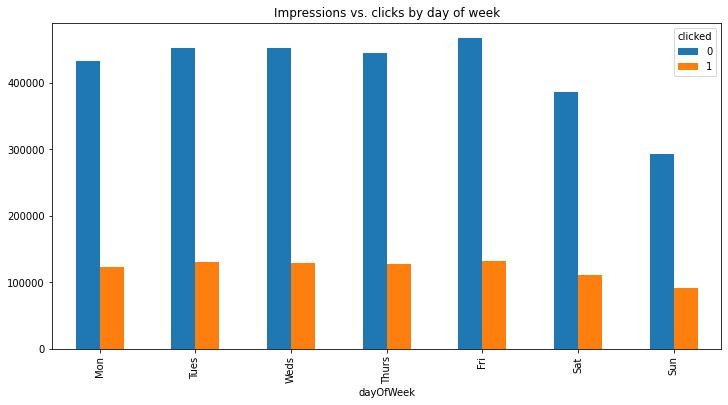

In [ ]:
cats = [0, 1, 2, 3, 4, 5, 6]
train_data.groupby(['dayOfWeek','clicked']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

<div dir='rtl'>
سپس نمودار قبلی را برای os و browser و device کشیدیم. همانطور که می‌بینیم یکسری از گروه‌های این سه فیلد مقدار بسیار کوچکی از  داده‌ها را دربر دارند. پس می‌توان آن فیچر ها را از هر فیلد حذف نمود. 

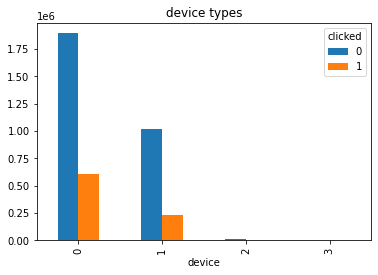

In [ ]:
train_data[['device','clicked']].groupby(['device','clicked']).size().unstack().plot(kind='bar', title='device types');

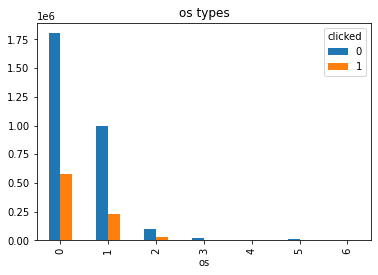

In [ ]:
train_data[['os','clicked']].groupby(['os','clicked']).size().unstack().plot(kind='bar', title='os types');

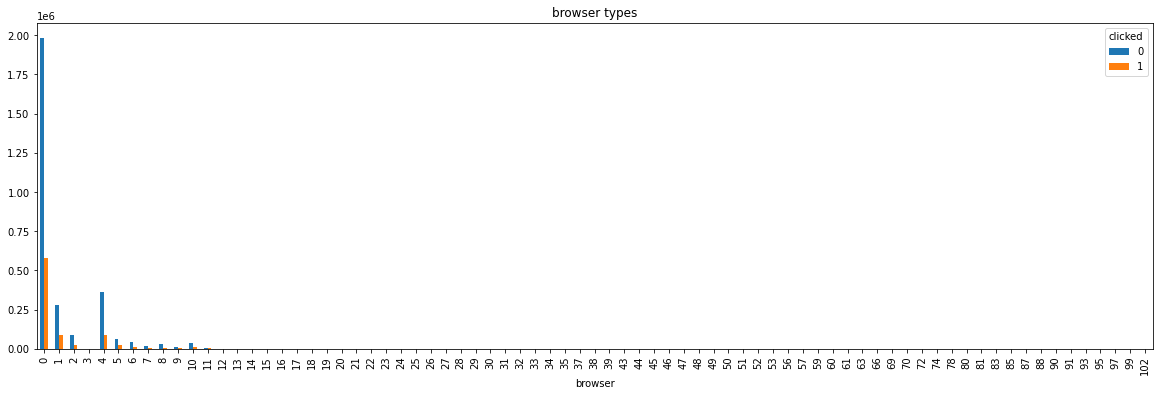

In [ ]:
train_data[['browser','clicked']].groupby(['browser','clicked']).size().unstack().plot(kind='bar', title='browser types', figsize=(20,6));

<div dir='rtl'>
برای تمیز کردن داده‌ها، در هر ستون داده‌ها با فراوانی کمتر را حذف می‌کنیم.

In [ ]:
df1 = train_data[train_data['userId'].map(train_data['userId'].value_counts()) > 10]
df1.shape

(885154, 16)

In [ ]:
df2 = df1[df1['docId'].map(df1['docId'].value_counts()) > 10]
df2.shape

(777206, 16)

In [ ]:
df3 = df2[df2['widgetId'].map(df2['widgetId'].value_counts()) > 10]
df3.shape

(776853, 16)

In [ ]:
df4 = df3[df3['creativeId'].map(df3['creativeId'].value_counts()) > 10]
df4.shape

(774956, 16)

<div dir='rtl'>
با توجه به نمودار های کشیده شده برای این سه فیلد، مقادیر outlier را حذف می‌کنیم.

In [ ]:
df5 = df4.drop(df4[df4.device > 1].index)
df5 = df5.drop(df5[df5.os > 3].index)
df5 = df5.drop(df5[df5.browser > 10].index)
df5.shape

(764734, 16)

<div dir='rtl'>
ستون timestamp را می‌توان به چهار ستون month, dayOfMonth, dayOfWeek و hourOfDay تبدیل کرد که از آنجایی که دو ستون dayOfWeek و hourOfDay را داریم تنها ستون‌های month و dayOfMonth را به دیتافریم اضافه می‌کنیم.

In [ ]:
from datetime import datetime
def timestamp2date(timestamp):
  return datetime.fromtimestamp(timestamp/1000)

df5['timestamp']=df5['timestamp'].apply(timestamp2date)
df5['Month'] = df5['timestamp'].dt.month
df5['dayOfMonth'] = df5['timestamp'].dt.day
df5 = df5.drop(['timestamp'], axis=1)
df5.head()

,displayId,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked,Month,dayOfMonth
55,4706200,4,0,8078,1587,4657,31,7691,0,0,0,32,6245932,88708,0,1,7
56,4706200,4,0,3344,2669,5236,31,7691,0,0,0,32,6245932,88708,0,1,7
57,4706200,4,0,6883,3382,4611,31,7691,0,0,0,32,6245932,88708,0,1,7
58,4706200,4,0,8078,1587,4658,31,7691,0,0,0,32,6245932,88708,1,1,7
81,4706160,4,0,290,5381,5198,18,14195,0,0,0,19,6207847,2138111,0,1,7


In [ ]:
features_df = df5.drop(['clicked'], axis=1)
features = np.array(features_df)
label = np.array(df5["clicked"])
print("clicked == 1:", np. count_nonzero(label == 1), "clicked == 0:", np. count_nonzero(label == 0))
print("(data size, feature count):", features.shape)

clicked == 1: 135600 clicked == 0: 629134
(data size, feature count): (764734, 16)


# Over Sampling and Under Sampling
<div dir='rtl'>
از آنجایی که داده نامتوازن بود، برای این مشکل از over sampling و under sampling استفاده می‌کنیم.

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(features_df, df5['clicked'])
print(Counter(y_over))

Counter({0: 629134, 1: 629134})


In [ ]:
cols = ['displayId', 'dayOfWeek', 'hourOfDay', 'advertiserId', 'campaignId',
       'creativeId', 'publisher', 'widgetId', 'device', 'os', 'browser',
       'source', 'docId', 'userId', 'Month', 'dayOfMonth', 'clicked']
df_over = pd.DataFrame(np.concatenate([X_over, y_over.reshape((y_over.shape[0], 1))], axis=1), columns=cols)
print(Counter(df_over['clicked']))

Counter({0: 629134, 1: 629134})


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(features_df, df5["clicked"])
print(Counter(y_under))

Counter({0: 135600, 1: 135600})


In [ ]:
df_under = pd.DataFrame(np.concatenate([X_under, y_under.reshape((y_under.shape[0], 1))], axis=1), columns=cols)
print(Counter(df_over['clicked']))

Counter({0: 629134, 1: 629134})


# Split data


<div dir='rtl'>
حال داده‌ها را به سه دسته train, validation و test تقسیم کردیم. با جست و جو به این نتیجه رسیدیم که تقسیم داده به شکل زیر باشد:<br>
train : 64% <br>
validation : 16% <br>
test : 20% <br>
<a href='https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validationhttps://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validation'>یکی از منابع استفاده شده</a>

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
  return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
X_over_train, y_over_train, X_over_valid, y_over_valid, X_over_test, y_over_test = split_data(X_over, y_over)

In [ ]:
X_under_train, y_under_train, X_under_valid, y_under_valid, X_under_test, y_under_test = split_data(X_under, y_under)

# Main test data

In [ ]:
test_data = pd.read_csv('/content/mydrive/MyDrive/ML_project/test_data.csv')
test_data['timestamp']=test_data['timestamp'].apply(timestamp2date)
test_data['Month'] = test_data['timestamp'].dt.month
test_data['dayOfMonth'] = test_data['timestamp'].dt.day
test_data = test_data.drop(['timestamp'], axis=1)
test_data.head()

,displayId,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,Month,dayOfMonth
0,1204095,4,0,6620,5773,7208,131,7006,0,0,0,139,1330976,697233,1,21
1,1204095,4,0,5180,6099,7003,131,7006,0,0,0,139,1330976,697233,1,21
2,1204095,4,0,5971,251,7125,131,7006,0,0,0,139,1330976,697233,1,21
3,1204095,4,0,6572,4150,7248,131,7006,0,0,0,139,1330976,697233,1,21
4,1204095,4,0,6572,4150,7245,131,7006,0,0,0,139,1330976,697233,1,21


# Feature Selection

<div dir='rtl'>
با استفاده از روش‌های مختلف کوریلیشن و Mutual Information چند نمونه فیچر سلکشن انجام دادیم ولی تمامی آن ها معیار‌های ارزیابی را بدتر می‌کردند. پس تصمیم گرفتیم از تمام فیچر ها استفاده کنیم.

# Metrics

<div dir='rtl'>
در این قسمت معیارهای F1, Cross Etropy , AUC و Accuracy را با استفاده از توابع آماده پیاده‌سازی کردیم.

In [ ]:
from sklearn.metrics import f1_score, log_loss, roc_auc_score, accuracy_score

def F1_measure(y_true, y_pred):
  return f1_score(y_true, y_pred, average='macro')

def cross_entropy(y_true, y_pred):
  return log_loss(y_true, y_pred)

def AUC_measure(y_true, y_pred):
  return roc_auc_score(y_true, y_pred)

def Accuracy(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

In [ ]:
def plot(x_plt, y_plt, title, color):
  plt.plot(x_plt, y_plt, linestyle='--', marker='o', color=color)
  plt.title(title)
  plt.show()

# CTR

<div dir='rtl'>
تعریف CTR نسبت تعداد دفعات کلیک شدن روی یک تبلیغ به تعداد دفعات نمایش آن است. در این قسمت این تعریف را پیاده کردیم.

In [ ]:
def CTR (data):
  df_ad = data[['advertiserId','clicked']].groupby(['advertiserId']).count().reset_index()
  df_ad = df_ad.rename(columns={'clicked': 'impressions'})
  df_ad['clicks'] = data[['advertiserId','clicked']].groupby(['advertiserId']).sum().reset_index()['clicked']
  df_ad['CTR'] = df_ad['clicks']/df_ad['impressions']*100
  return df_ad

In [ ]:
def plot_ctr(main, pred):
  plt.figure(figsize=(12, 6))
  plt.scatter(pred['CTR'], main['CTR'])
  plt.title("CTR")
  plt.show()

# Reliability diagram

In [ ]:
from sklearn.calibration import calibration_curve

def plot_reliability_diagram_labels(y_true, y_pred, groups):
  y, x = calibration_curve(y_true, y_pred, n_bins=groups)
  plt.plot(x, y, marker='o', color=np.random.rand(3,))
  plt.plot(x, x, linestyle='--')
  plt.xlabel("mean predicted value")
  plt.ylabel("percentage of true clicks")
  plt.show()


def plot_reliability_diagram_CTR(y_true, y_pred, groups_count):
  y_pred_copy = y_pred.copy()
  y_true_copy = y_true.copy()
  y_pred_copy['CTR'] = y_pred_copy['CTR']/100
  y_true_copy['CTR'] = y_true_copy['CTR']/100
  y_pred_copy = y_pred_copy.sort_values(by=['CTR'])
  x, y = [], []
  start , end = y_pred_copy['CTR'].min(), y_pred_copy['CTR'].max()
  len = (end - start)/groups_count
  x = y_pred_copy.groupby(pd.cut(y_pred_copy['CTR'], np.arange(start, end+len, len))).mean()['CTR']
  groups = y_pred_copy.groupby(pd.cut(y_pred_copy['CTR'], np.arange(start, end+len, len))).groups
  for k in groups:
    y.append(y_true_copy.loc[list(groups[k]), 'CTR'].mean())
  plt.plot(x, y, marker='o', color=np.random.rand(3,))
  plt.plot(x, x, linestyle='--')
  plt.xlabel("mean predicted value")
  plt.ylabel("percentage of true clicks")
  plt.show()
  return

# Save the test_result

In [ ]:
import pickle 

def save_result(result, file_name):
  name = "/content/mydrive/MyDrive/ML_project/"+file_name+".pkl"
  with open(name, 'wb') as file:
      pickle.dump(result, file)

# Random Forest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

<div dir='rtl'>
در این قسمت random_forest را با استفاده از توابع آماده پیاده‌سازی کردیم. سپس با تغییر دو پارامتر تعداد و عمق درخت‌ها بهترین پارامتر‌ها را روی داده ولیدیشن پیدا کردیم. بهترین پارامتر‌ها را نیز با جست و جو پارامتر‌هایی منطقی برای هر کدام از متغیرهای مدل به دست آورده و جایگذاری کردیم. بهترین پارامتر را پارامتری با بیشترین معیارهای ارزیابی و کمترین cross entropy loss در نظر گرفتیم.

In [ ]:
def random_forest(X, y, tree_count, max_depth):
  random_forest = RandomForestClassifier(n_estimators=tree_count, max_depth=max_depth)
  clf = random_forest.fit(X, y)
  return clf


def rf_find_parameter(X_train, y_train, X_valid, y_valid, parameters):
  f1, ce, auc, accuracy = [], [], [], []
  for i in range(len(parameters)):
    print(parameters[i])
    clf = random_forest(X_train, y_train, parameters[i][0], parameters[i][1])
    y_pred= clf.predict(X_valid)
    probs = clf.predict_proba(X_valid)
    f1.append(F1_measure(y_valid, y_pred))
    ce.append(cross_entropy(y_valid, probs))
    auc.append(AUC_measure(y_valid, probs[:, 1]))
    accuracy.append(Accuracy(y_valid, y_pred))
  return f1, ce, auc, accuracy

## Random forest on undersampled data

<div dir='rtl'>
برای تست پارامتر‌ها ابتدا تعداد درخت‌ها را ثابت در نظر گرفته و عمق درخت را از ۴ تا ۲۵ تغییر می‌دهیم.

[50, 4]
[50, 10]
[50, 25]


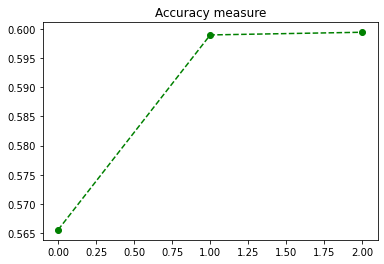

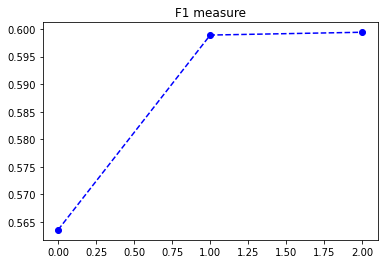

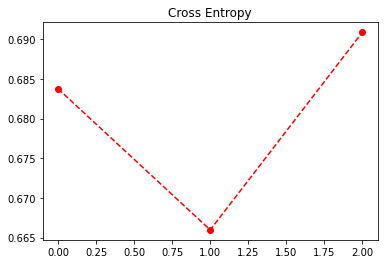

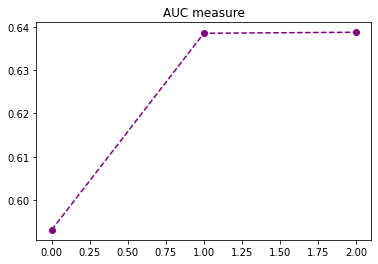

In [ ]:
params = [[50, 4], [50, 10], [50, 25]]
f1, ce, auc, accuracy = rf_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], accuracy, "Accuracy measure", 'green')
plot([i for i in range(len(params))], f1, "F1 measure", 'blue')
plot([i for i in range(len(params))], ce, "Cross Entropy", 'red')
plot([i for i in range(len(params))], auc, "AUC measure", 'purple')

<div dir='rtl'>
 عمق درخت‌ها را ثابت در نظر گرفته و تعداد درخت را از ۱۰ تا ۵۰ تغییر می‌د‌هیم.

[10, 25]
[20, 25]
[50, 25]


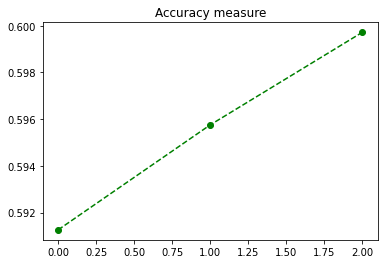

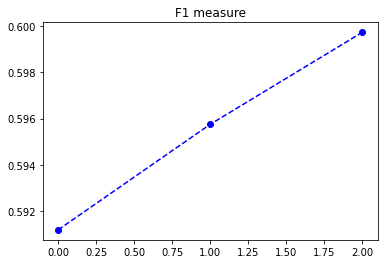

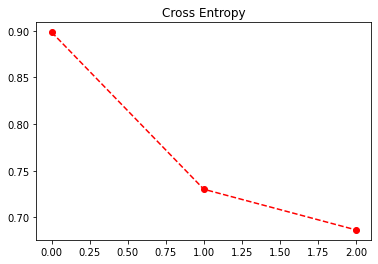

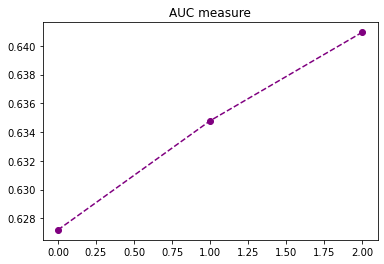

In [ ]:
params = [[10, 25], [20, 25], [50, 25]]
f1, ce, auc, accuracy = rf_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], accuracy, "Accuracy measure", 'green')
plot([i for i in range(len(params))], f1, "F1 measure", 'blue')
plot([i for i in range(len(params))], ce, "Cross Entropy", 'red')
plot([i for i in range(len(params))], auc, "AUC measure", 'purple')

<div dir='rtl'>
با توجه به نتایج گرفته شده بهترین پارامتر‌ها تعداد ۵۰ درخت با عمق ۱۰ می‌باشد. پس با این پارامتر‌ها کلسیفایر را روی داده تست امتحان می‌کنیم.

In [ ]:
clf_under = random_forest(X_under_train, y_under_train, 50, 10)
y_under_pred = clf_under.predict(X_under_test)
probs = clf_under.predict_proba(X_under_test)
print("f1 measure = ", F1_measure(y_under_test, y_under_pred))
print("Cross entropy = ",cross_entropy(y_under_test, probs))
print("AUC measure = ",AUC_measure(y_under_test, probs[:, 1]))
print("Accuracy = ",Accuracy(y_under_test, y_under_pred))

f1 measure =  0.5979812349797009
Cross entropy =  0.6662249686349845
AUC measure =  0.6374482683219208
Accuracy =  0.5980641592920354


<div dir='rtl'>
در این قسمت نرخ کلیک پیش بینی شده و نرخ کلیک واقعی را با استفاده از تابع CTR که در بالا پیاده سازی شده به دست آورده و نمودار آن‌ها را برحسب هم می‌کشیم.

In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_test.reshape((y_under_test.shape[0], 1))], axis=1), columns=cols))
y_under_pred = np.array(y_under_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_pred.reshape((y_under_pred.shape[0], 1))], axis=1), columns=cols))

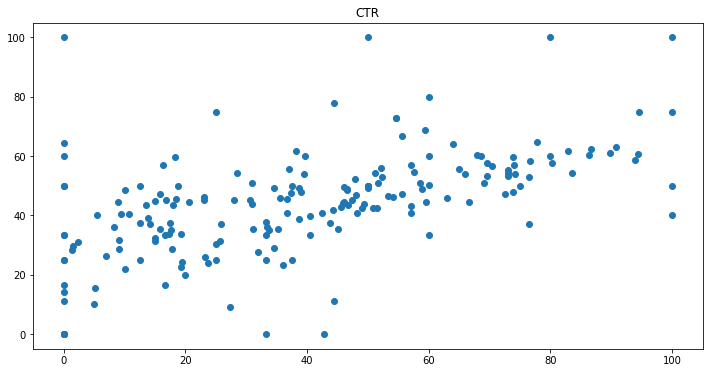

In [ ]:
plot_ctr(ctr_main, ctr_pred)

<div dir='rtl'>
در این قسمت داده‌ها را بر اساس نرخ تخمین زده شده برای آن‌ها بازی‌بندی کردیم و درصد داده‌های کلیک شده هر گروه را نرخ کلیک واقعی گرفته و نمودار آن‌ها را برحسب هم کشیدیم. 

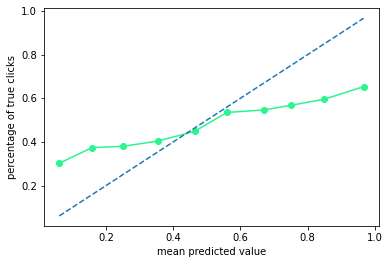

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

<div dir='rtl'>
حال نمودار reliability را برای لیبل‌های اصلی و احتمالات پیش‌بینی شده می‌کشیم که نزدیکی آن به خط y=x نشان می‌دهد که مدل عملکرد خوبی دارد.

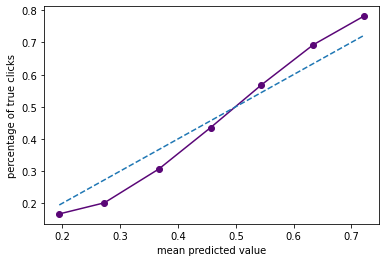

In [ ]:
plot_reliability_diagram_labels(y_under_test, probs[:, 1], 10)

## Random forest on oversampled data

<div dir='rtl'>
برای تست پارامتر‌ها ابتدا تعداد درخت‌ها را ثابت در نظر گرفته و عمق درخت را از ۴ تا ۲۵ تغییر می‌دهیم.

[50, 4]
[50, 10]
[50, 25]


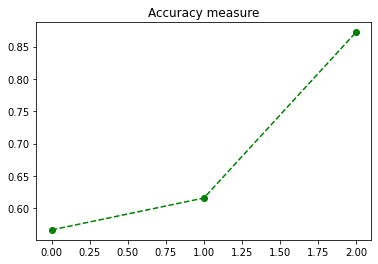

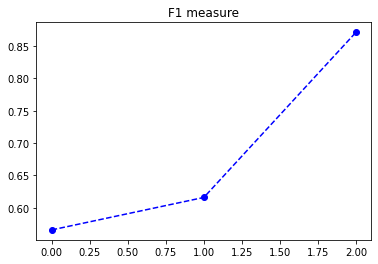

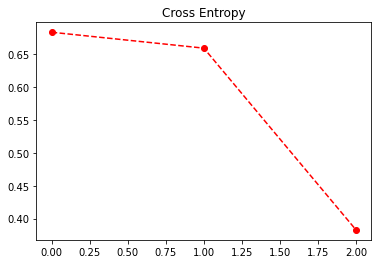

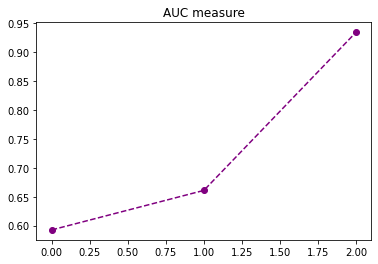

In [ ]:
params = [[50, 4], [50, 10], [50, 25]]
f1, ce, auc, accuracy = rf_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], accuracy, "Accuracy measure", 'green')
plot([i for i in range(len(params))], f1, "F1 measure", 'blue')
plot([i for i in range(len(params))], ce, "Cross Entropy", 'red')
plot([i for i in range(len(params))], auc, "AUC measure", 'purple')

<div dir='rtl'>
 عمق درخت‌ها را ثابت در نظر گرفته و تعداد درخت را از ۱۰ تا ۵۰ تغییر می‌د‌هیم.

[10, 25]
[20, 25]
[50, 25]


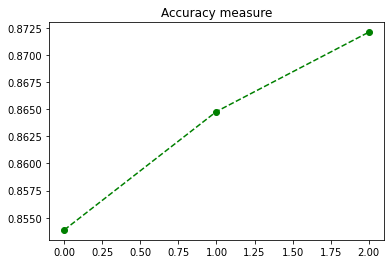

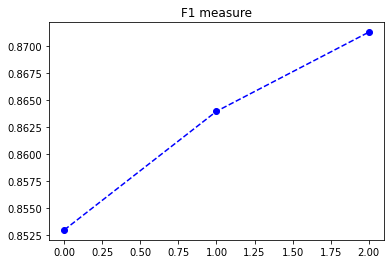

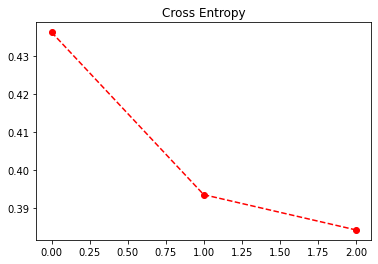

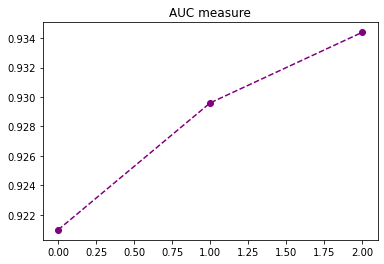

In [ ]:
params = [[10, 25], [20, 25], [50, 25]]
f1, ce, auc, accuracy = rf_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], accuracy, "Accuracy measure", 'green')
plot([i for i in range(len(params))], f1, "F1 measure", 'blue')
plot([i for i in range(len(params))], ce, "Cross Entropy", 'red')
plot([i for i in range(len(params))], auc, "AUC measure", 'purple')

<div dir='rtl'>
با توجه به نتایج گرفته شده بهترین پارامتر‌ها تعداد ۵۰ درخت با عمق ۲۵ می‌باشد. پس با این پارامتر‌ها کلسیفایر را روی داده تست امتحان می‌کنیم.

In [ ]:
clf_over = random_forest(X_over_train, y_over_train, 50, 25)
y_over_pred = clf_over.predict(X_over_test)
probs = clf_over.predict_proba(X_over_test)
print("f1 measure = ", F1_measure(y_over_test, y_over_pred))
print("Cross entropy = ",cross_entropy(y_over_test, probs))
print("AUC measure = ",AUC_measure(y_over_test, probs[:, 1]))
print("Accuracy = ",Accuracy(y_over_test, y_over_pred))

f1 measure =  0.8708678237702702
Cross entropy =  0.38307271305013524
AUC measure =  0.9341897895083245
Accuracy =  0.8716531428071876


In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_test.reshape((y_over_test.shape[0], 1))], axis=1), columns=cols))
y_over_pred = np.array(y_over_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_pred.reshape((y_over_pred.shape[0], 1))], axis=1), columns=cols))

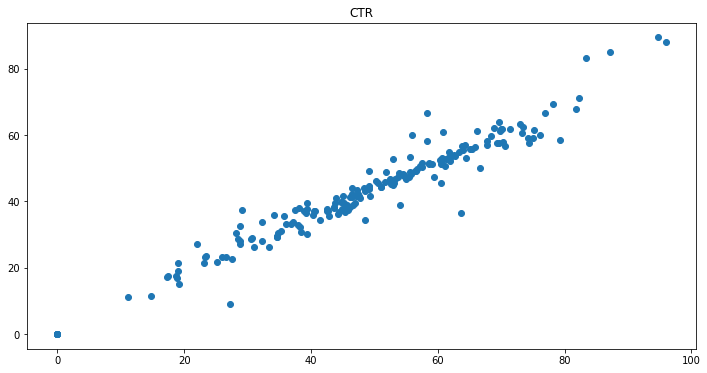

In [ ]:
plot_ctr(ctr_main, ctr_pred)

<div dir='rtl'>
همانطور که می‌بینیم ctr_pred و ctr_main رابطه‌ای شبه خطی دارند. پس مدل عملکرد خوبی دارد =)

<div dir='rtl'>
از نظر مقایسه CTR ها این مدل بهتر از undersampleعمل کرده است.

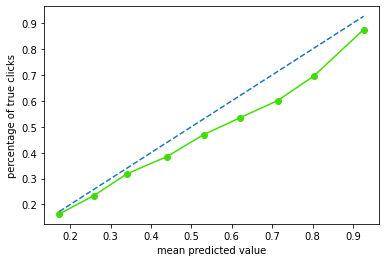

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

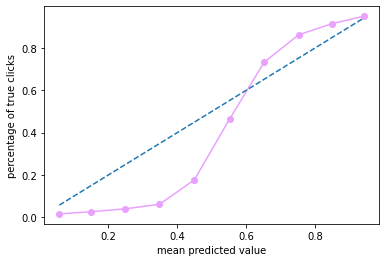

In [ ]:
plot_reliability_diagram_labels(y_over_test, probs[:, 1], 10)

## Results on main test data
<div dir='rtl'>
با توجه به آنکه نتیجه clf_over بهتر از clf_under شده بود پس برای تست نهایی از clf_over استفاده می‌کنیم:

In [ ]:
y_main_test = clf_over.predict(test_data)
save_result(y_main_test, "randomForest")

# SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV

<div dir='rtl'>
بهترین پارامتر‌ها را با جست و جو پارامتر‌هایی منطقی برای هر کدام از متغیرهای مدل به دست آورده و جایگذاری کردیم. بهترین پارامتر را پارامتری با بیشترین معیارهای ارزیابی و کمترین cross entropy loss در نظر گرفتیم.

In [ ]:
def svm(X, y, c):
  svm = LinearSVC(C=c, max_iter=10000)
  clf = CalibratedClassifierCV(svm) 
  clf = clf.fit(X, y)
  return clf


def svm_find_parameter(X_train, y_train, X_valid, y_valid, parameters):
  f1, ce, auc, accuracy = [], [], [], []
  for i in range(len(parameters)):
    print(parameters[i])
    clf = svm(X_train, y_train, parameters[i])
    y_pred= clf.predict(X_valid)
    probs = clf.predict_proba(X_valid)
    f1.append(F1_measure(y_valid, y_pred))
    ce.append(cross_entropy(y_valid, probs))
    auc.append(AUC_measure(y_valid, probs[:, 1]))
    accuracy.append(Accuracy(y_valid, y_pred))
  return f1, ce, auc, accuracy

## SVM for undersample data

<div dir='rtl'>
پارامتر‌ C موجود در soft svm را مقادیر ۱و ۲و ۱۰ قرار دادیم. ۲ بهترین مقدار ارزیابی شد.

1
2
10


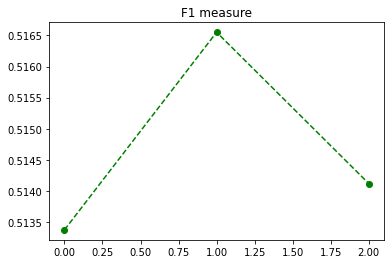

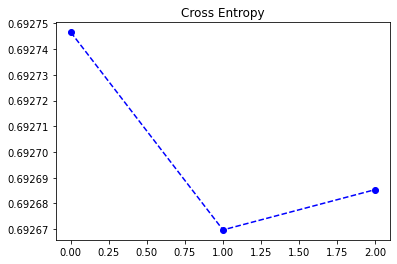

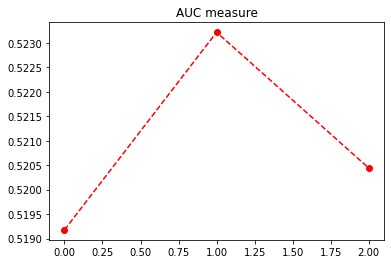

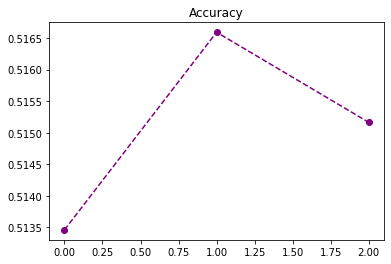

In [ ]:
params = [1, 2, 10]
f1, ce, auc, accuracy = svm_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

In [ ]:
clf_under = svm(X_under_train, y_under_train, 2)
y_under_pred = clf_under.predict(X_under_test)
probs = clf_under.predict_proba(X_under_test)
print("f1 measure = ", F1_measure(y_under_test, y_under_pred))
print("Cross entropy = ",cross_entropy(y_under_test, probs))
print("AUC measure = ",AUC_measure(y_under_test, probs[:, 1]))
print("Accuracy = ",Accuracy(y_under_test, y_under_pred))

f1 measure =  0.5141603039380591
Cross entropy =  0.6929152777157193
AUC measure =  0.5170216688344196
Accuracy =  0.5141961651917404


In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_test.reshape((y_under_test.shape[0], 1))], axis=1), columns=cols))
y_under_pred = np.array(y_under_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_pred.reshape((y_under_pred.shape[0], 1))], axis=1), columns=cols))

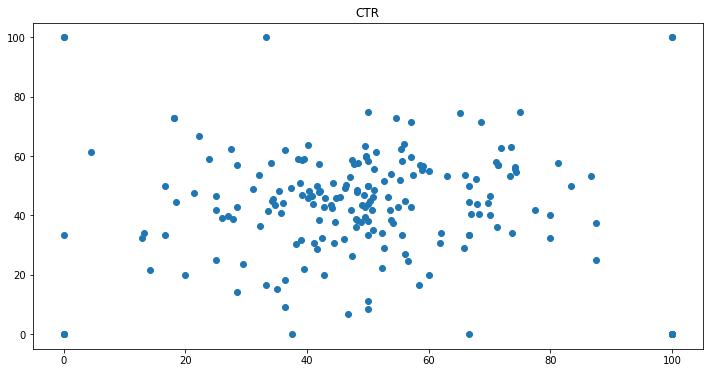

In [ ]:
plot_ctr(ctr_main, ctr_pred)

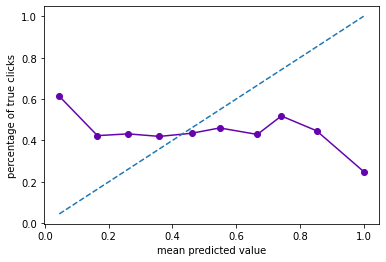

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

<div dir="rtl">
در تصویر زیر نمودار reliability لیبل‌های اصلی بر اساس لیبل‌های پیش‌بینی شده را می‌توانید ببینید که با توجه به اعداد محور y بهم نزدیک هستند و مدل خوب عمل کرده است.

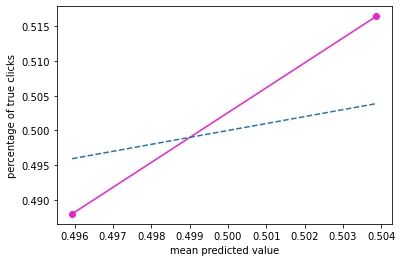

In [ ]:
plot_reliability_diagram_labels(y_under_test, probs[:, 1], 10)

## SVM for oversample data

In [ ]:
params = [1, 2, 10]
f1, ce, auc, accuracy = svm_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

In [ ]:
clf_over = svm(X_over_train, y_over_train, 1)
y_over_pred = clf_over.predict(X_over_test)
probs = clf_over.predict_proba(X_over_test)
print("f1 measure = ", F1_measure(y_over_test, y_over_pred))
print("Cross entropy = ",cross_entropy(y_over_test, probs))
print("AUC measure = ",AUC_measure(y_over_test, probs[:, 1]))
print("Accuracy = ",Accuracy(y_over_test, y_over_pred))

In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_test.reshape((y_over_test.shape[0], 1))], axis=1), columns=cols))
y_over_pred = np.array(y_over_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_pred.reshape((y_over_pred.shape[0], 1))], axis=1), columns=cols))

In [ ]:
plot_ctr(ctr_main, ctr_pred)

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

In [ ]:
plot_reliability_diagram_labels(y_over_test, probs[:, 1], 10)

## Results on main test data

In [ ]:
y_main_test = clf_over.predict(test_data)
save_result(y_main_test, "svm")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

<div dir="rtl">
در قسمت زیر، تابع logistic_regression را با استفاده از توابع آماده پیاده‌سازی کرده‌ایم.
در تابع زیرین آن، بهترین پارامتر یعنی ضریب C را روی داده ولیدیشن به دست می‌آوریم. بهترین پارامتر را نیز با جست و جو به دست آوردیم.

In [ ]:
def logistic_regression(X, y, landa):
  logistic_regression = LogisticRegression(C=landa, penalty="l1", solver="saga", max_iter=1000)
  clf = logistic_regression.fit(X, y)
  return clf


def lg_find_parameter(X_train, y_train, X_valid, y_valid, parameters):
  f1, ce, auc, accuracy = [], [], [], []
  for i in range(len(parameters)):
    print(parameters[i])
    clf = logistic_regression(X_train, y_train, parameters[i])
    y_pred= clf.predict(X_valid)
    probs = clf.predict_proba(X_valid)
    f1.append(F1_measure(y_valid, y_pred))
    ce.append(cross_entropy(y_valid, probs))
    auc.append(AUC_measure(y_valid, probs[:, 1]))
    accuracy.append(Accuracy(y_valid, y_pred))
  return f1, ce, auc, accuracy

## Logistic Regression on Under Sampled Data

<div dir="rtl">
مقادیر مختلف معیارها را برای C های مختلف به دست می‌آوریم.

1e-07
1e-05
0.001
1


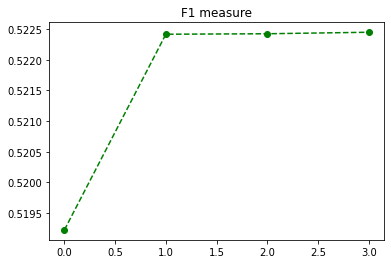

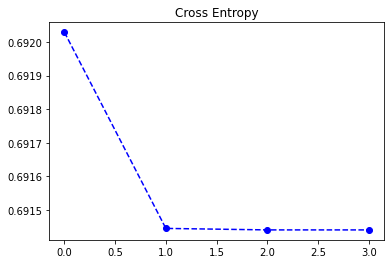

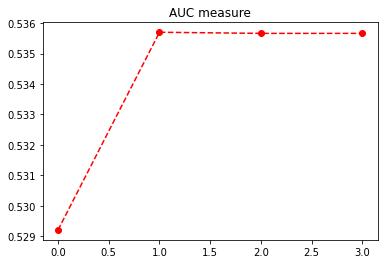

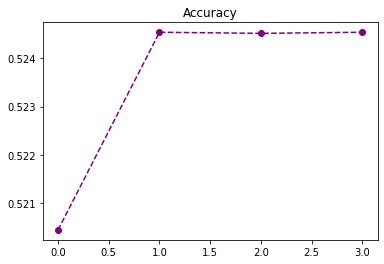

In [ ]:
params = [0.0000001, 0.00001, 0.001, 1]
f1, ce, auc, accuracy = lg_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
با توجه به این که بهترین C مقدار یک است، نتیجه را روی داده‌ی تست به دست می‌آوریم.

In [ ]:
clf_under = logistic_regression(X_under_train, y_under_train, 1)
y_under_pred = clf_under.predict(X_under_test)
probs = clf_under.predict_proba(X_under_test)
print("f1 measure = ", F1_measure(y_under_test, y_under_pred))
print("Cross entropy = ",cross_entropy(y_under_test, probs))
print("AUC measure = ",AUC_measure(y_under_test, probs[:, 1]))
print("Accuracy = ",Accuracy(y_under_test, y_under_pred))

f1 measure =  0.5173043384987149
Cross entropy =  0.6918376682091013
AUC measure =  0.5316307698854091
Accuracy =  0.5195980825958703


In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_test.reshape((y_under_test.shape[0], 1))], axis=1), columns=cols))
y_under_pred = np.array(y_under_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_pred.reshape((y_under_pred.shape[0], 1))], axis=1), columns=cols))

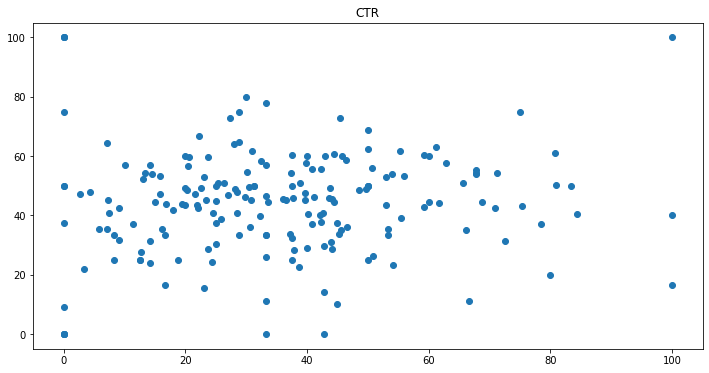

In [ ]:
plot_ctr(ctr_main, ctr_pred)

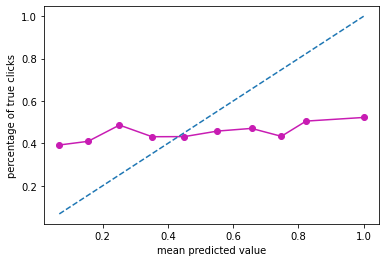

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

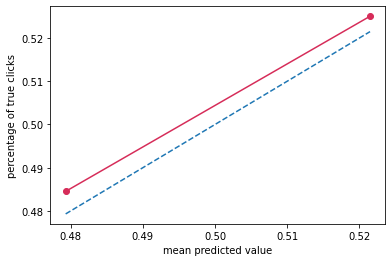

In [ ]:
plot_reliability_diagram_labels(y_under_test, probs[:, 1], 10)

## Logistic Regression on Over Sampled Data

<div dir="rtl">
مشابها برای داده oversampled تکرار می‌کنیم.

1e-07
1e-05
0.001
1


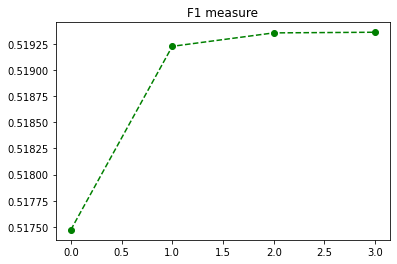

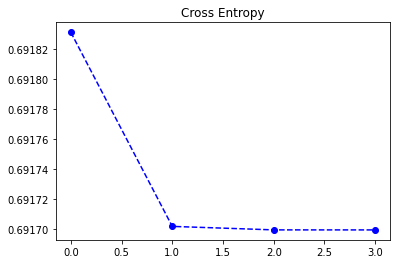

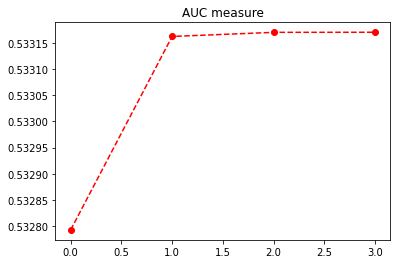

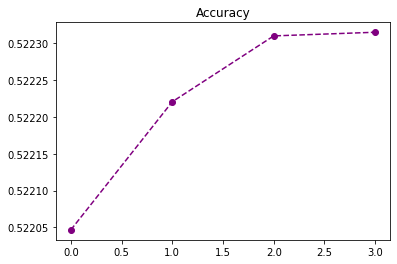

In [ ]:
params = [0.0000001, 0.00001, 0.001, 1]
f1, ce, auc, accuracy = lg_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

In [ ]:
clf_over = logistic_regression(X_over_train, y_over_train, 1)
y_over_pred = clf_over.predict(X_over_test)
probs = clf_over.predict_proba(X_over_test)
print("f1 measure = ", F1_measure(y_over_test, y_over_pred))
print("Cross entropy = ",cross_entropy(y_over_test, probs))
print("AUC measure = ",AUC_measure(y_over_test, probs[:, 1]))
print("Accuracy = ",Accuracy(y_over_test, y_over_pred))

f1 measure =  0.5202082936735942
Cross entropy =  0.6917819693891464
AUC measure =  0.5324166833238656
Accuracy =  0.5226859100193122


In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_test.reshape((y_over_test.shape[0], 1))], axis=1), columns=cols))
y_over_pred = np.array(y_over_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_pred.reshape((y_over_pred.shape[0], 1))], axis=1), columns=cols))

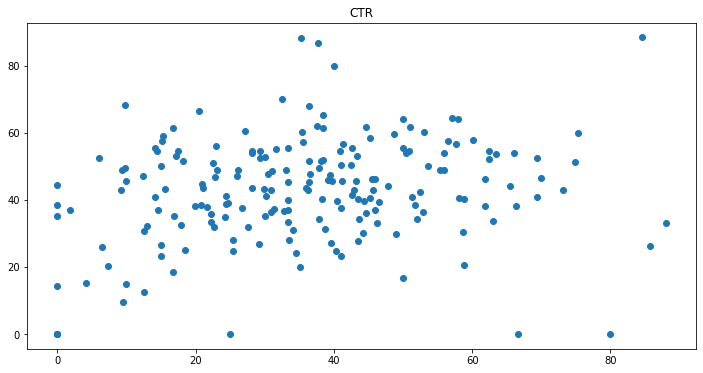

In [ ]:
plot_ctr(ctr_main, ctr_pred)

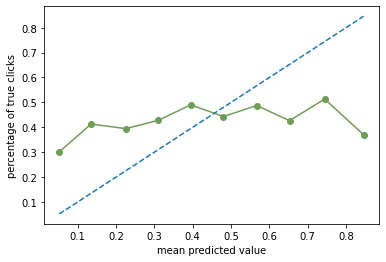

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

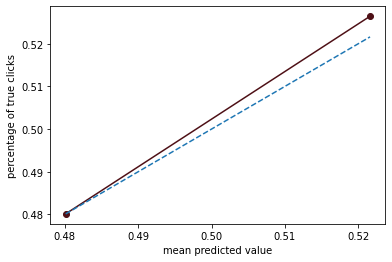

In [ ]:
plot_reliability_diagram_labels(y_over_test, probs[:, 1], 10)

##Results on main test data
<div dir="rtl">
نتیجه بخش oversampling بهتر شده است بنابراین آن را روی داده تست اصلی امتحان می‌کنیم.

In [ ]:
y_main_test = clf_over.predict(test_data)
save_result(y_main_test, "logisticregression")

[0 0 0 ... 1 0 0]


# XGBoost

<div dir="rtl">
تابع XGBoost را با استفاده از توابع آماده پیاده‌سازی می‌کنیم.
سپس بهترین پارامتر را روی داده‌های ولیدیشن پیدا می‌کنیم. پارامتر‌ها نیز را با جست و جو به دست آورده و تست کردیم.

In [ ]:
import xgboost as xgb

def XGBoost(X, y, param, num_round):
  dtrain = xgb.DMatrix(X, label=y)
  clf = xgb.train(param, dtrain, num_round)
  return clf


def xgb_find_parameter(X_train, y_train, X_valid, y_valid, parameters):
  f1, ce, auc, accuracy = [], [], [], []
  for i in range(len(parameters)):
    print(parameters[i])
    clf = XGBoost(X_train, y_train, parameters[i][0], parameters[i][1])
    dvalid = xgb.DMatrix(X_valid)
    probs_1 = clf.predict(dvalid)
    probs = []
    for p in probs_1:
      probs.append([1-p, p])
    probs = np.array(probs)
    y_pred = [1 if p >= 0.5 else 0 for p in probs_1]
    f1.append(F1_measure(y_valid, y_pred))
    ce.append(cross_entropy(y_valid, probs))
    auc.append(AUC_measure(y_valid, probs[:, 1]))
    accuracy.append(Accuracy(y_valid, y_pred))
  return f1, ce, auc, accuracy

## XGBoost on Under Sampled Data

<div dir="rtl">
تغییر پارامتر عمق

[{'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 2]


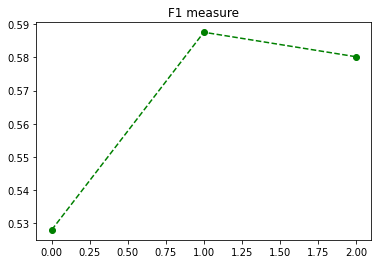

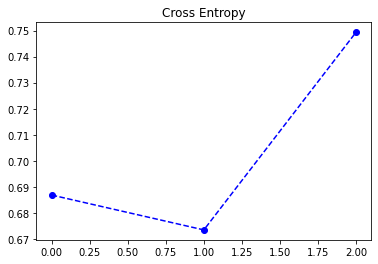

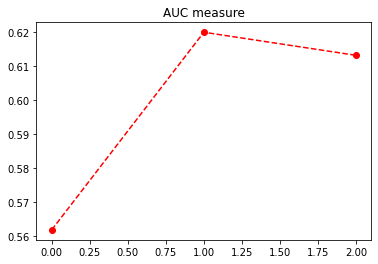

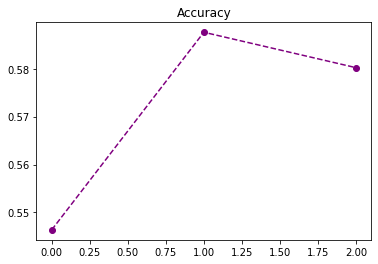

In [ ]:
params = [[{'max_depth':2, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 2]]
f1, ce, auc, accuracy = xgb_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
تغییر پارامتر اتا

[{'max_depth': 10, 'eta': 0.1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 10, 'eta': 10, 'objective': 'binary:logistic'}, 2]


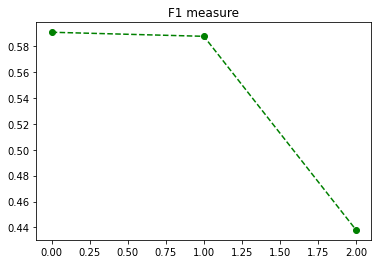

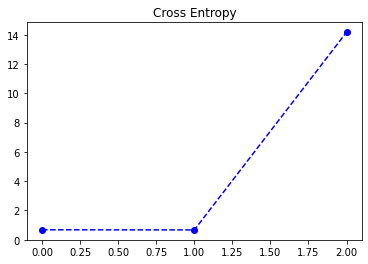

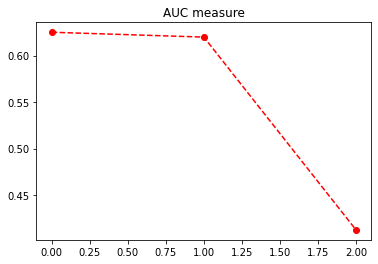

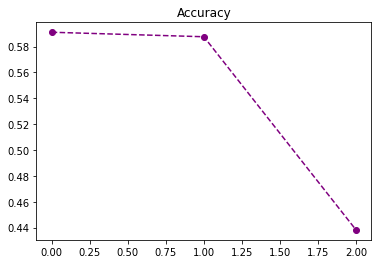

In [ ]:
params = [[{'max_depth':10, 'eta':0.1, 'objective':'binary:logistic' }, 2], [{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':10, 'eta':10, 'objective':'binary:logistic' }, 2]]
f1, ce, auc, accuracy = xgb_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
تغییر پارامتر objective

[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:hinge'}, 2]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logitraw'}, 2]


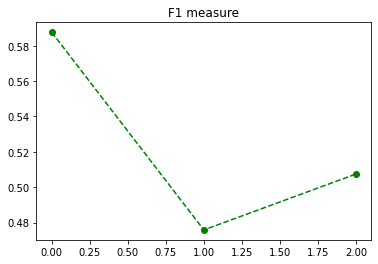

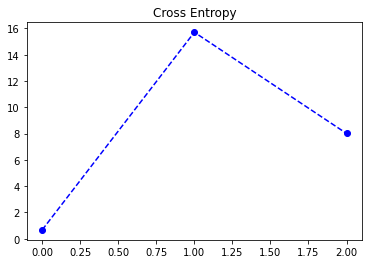

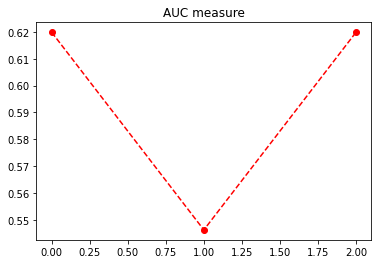

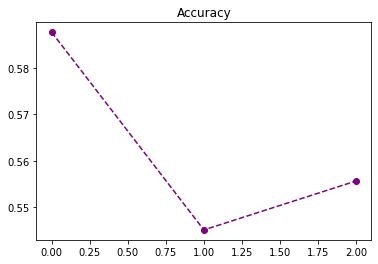

In [ ]:
params = [[{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':10, 'eta':1, 'objective':'binary:hinge' }, 2], [{'max_depth':10, 'eta':1, 'objective':'binary:logitraw' }, 2]]
f1, ce, auc, accuracy = xgb_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
تغییر num round

[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 5]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 10]


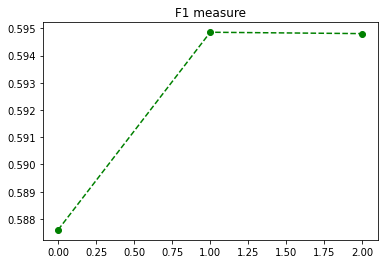

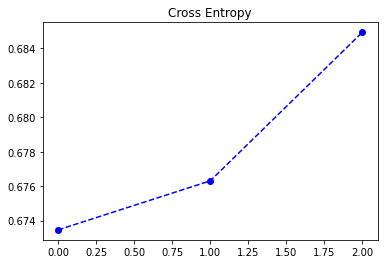

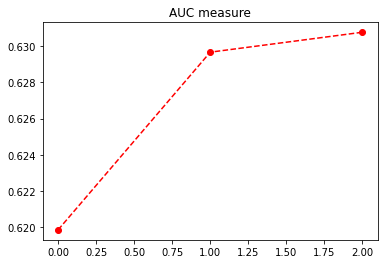

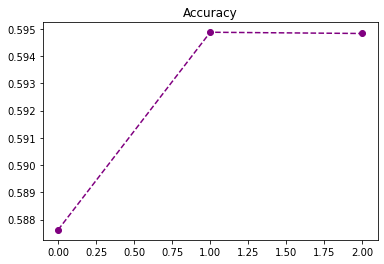

In [ ]:
params = [[{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 5], [{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 10]]
f1, ce, auc, accuracy = xgb_find_parameter(X_under_train, y_under_train, X_under_valid, y_under_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir='rtl'>
بهترین پارامتر ها: <br>
</div>
[{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 5]

<div dir="rtl">
نتیجه روی داده تست با بهترین پارامترها:

In [ ]:
parameters = [{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 5]
clf_under = XGBoost(X_under_train, y_under_train, parameters[0], parameters[1])
dtest = xgb.DMatrix(X_under_test)
probs_1 = clf_under.predict(dtest)
probs = []
for p in probs_1:
  probs.append([1-p, p])
probs = np.array(probs)
y_under_pred = [1 if p >= 0.5 else 0 for p in probs_1]
print("F1 measure", F1_measure(y_under_test, y_under_pred))
print("Cross entropy", cross_entropy(y_under_test, probs))
print("AUC measure", AUC_measure(y_under_test, probs[:, 1]))
print("Accuracy", Accuracy(y_under_test, y_under_pred))

F1 measure 0.593638684241718
Cross entropy 0.6777886652626387
AUC measure 0.6298537806657558
Accuracy 0.5936393805309734


In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_test.reshape((y_under_test.shape[0], 1))], axis=1), columns=cols))
y_under_pred = np.array(y_under_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_under_test, 
                                            y_under_pred.reshape((y_under_pred.shape[0], 1))], axis=1), columns=cols))

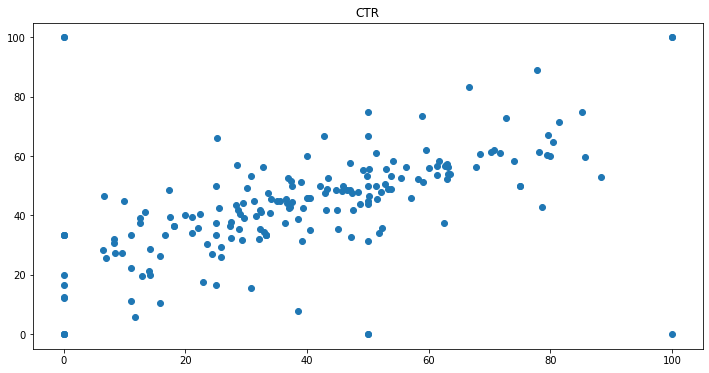

In [ ]:
plot_ctr(ctr_main, ctr_pred)

<div dir='rtl'>
همانطور که می‌بینیم این نمودار خطی شده است. پس این مدل مدل بسیار خوبی می‌باشد.

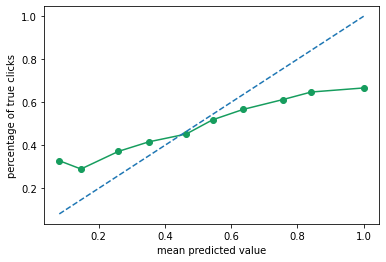

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

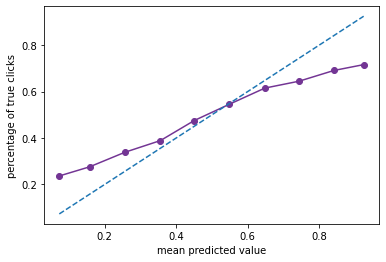

In [ ]:
plot_reliability_diagram_labels(y_under_test, probs[:, 1], 10)

## XGBoost on Over Sampled Data

<div dir="rtl">
تغییر پارامتر عمق

[{'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 2]


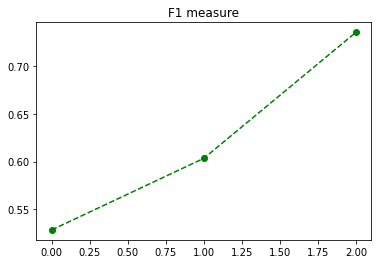

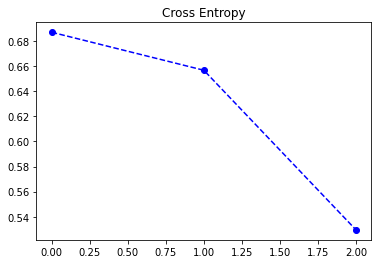

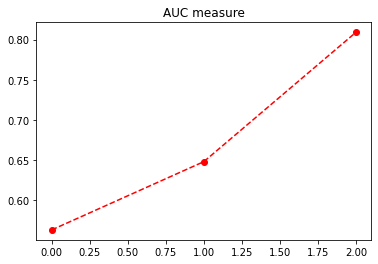

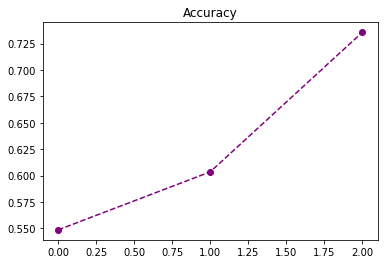

In [ ]:
params = [[{'max_depth':2, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':10, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 2]]
f1, ce, auc, accuracy = xgb_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
تغییر پارمتر اتا

[{'max_depth': 20, 'eta': 0.1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 20, 'eta': 10, 'objective': 'binary:logistic'}, 2]


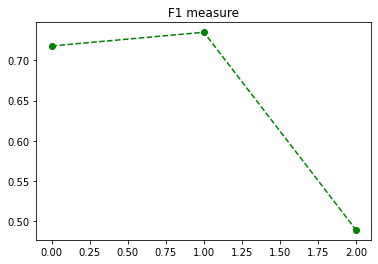

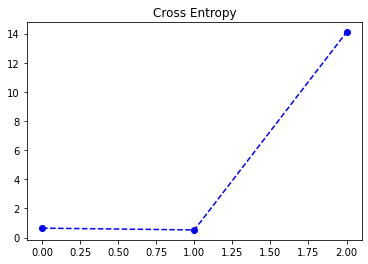

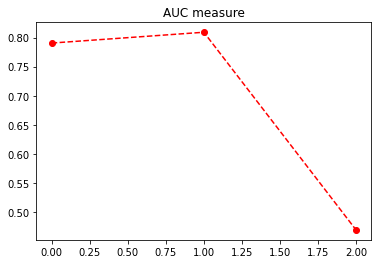

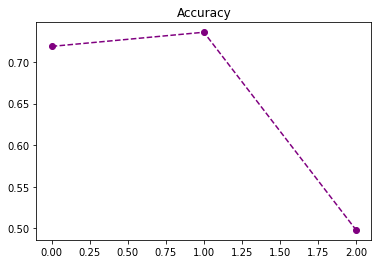

In [ ]:
params = [[{'max_depth':20, 'eta':0.1, 'objective':'binary:logistic' }, 2], [{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':20, 'eta':10, 'objective':'binary:logistic' }, 2]]
f1, ce, auc, accuracy = xgb_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
تغییر پارامتر objective

[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:hinge'}, 2]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logitraw'}, 2]


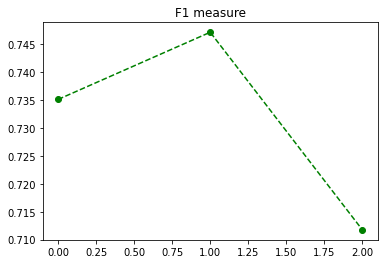

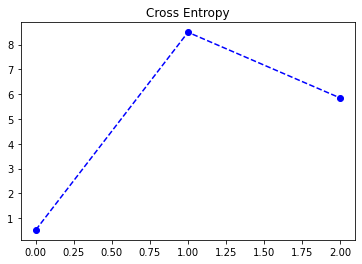

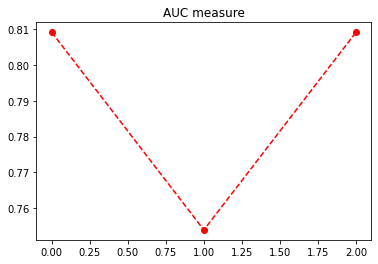

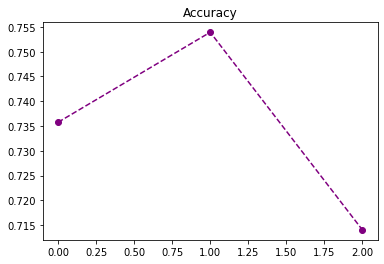

In [ ]:
params = [[{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':20, 'eta':1, 'objective':'binary:hinge' }, 2], [{'max_depth':20, 'eta':1, 'objective':'binary:logitraw' }, 2]]
f1, ce, auc, accuracy = xgb_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir="rtl">
تغییر num round

[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 2]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 5]
[{'max_depth': 20, 'eta': 1, 'objective': 'binary:logistic'}, 10]


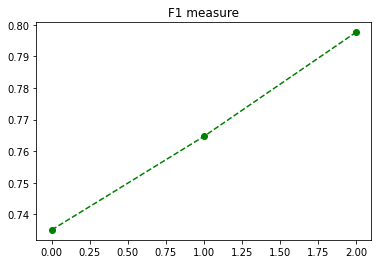

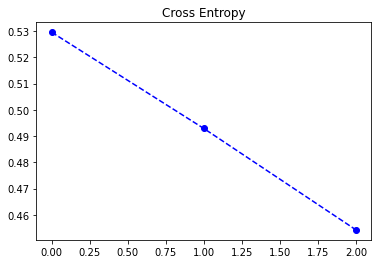

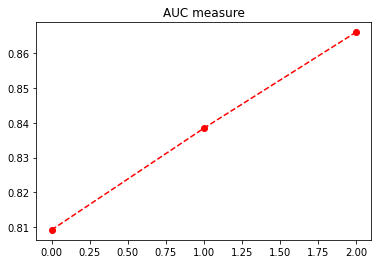

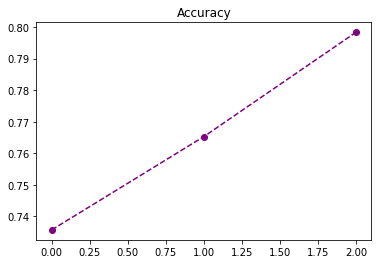

In [ ]:
params = [[{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 2], [{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 5], [{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 10]]
f1, ce, auc, accuracy = xgb_find_parameter(X_over_train, y_over_train, X_over_valid, y_over_valid, params)
plot([i for i in range(len(params))], f1, "F1 measure", "green")
plot([i for i in range(len(params))], ce, "Cross Entropy", "blue")
plot([i for i in range(len(params))], auc, "AUC measure", "red")
plot([i for i in range(len(params))], accuracy, "Accuracy", "purple")

<div dir='rtl'>
بهترین پارامتر ها: <br>
</div>
[{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 10]

<div dir="rtl">
نتیجه روی داده تست با بهترین پارامترها:

In [ ]:
parameters = [{'max_depth':20, 'eta':1, 'objective':'binary:logistic' }, 10]
clf_over = XGBoost(X_over_train, y_over_train, parameters[0], parameters[1])
dtest = xgb.DMatrix(X_over_test)
probs_1 = clf_over.predict(dtest)
probs = []
for p in probs_1:
  probs.append([1-p, p])
probs = np.array(probs)
y_over_pred = [1 if p >= 0.5 else 0 for p in probs_1]
print("F1 measure", F1_measure(y_over_test, y_over_pred))
print("Cross entropy", cross_entropy(y_over_test, probs))
print("AUC measure", AUC_measure(y_over_test, probs[:, 1]))
print("Accuracy", Accuracy(y_over_test, y_over_pred))

F1 measure 0.8058874727245315
Cross entropy 0.44623034108711385
AUC measure 0.871472511985379
Accuracy 0.806619406009839


In [ ]:
ctr_main = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_test.reshape((y_over_test.shape[0], 1))], axis=1), columns=cols))
y_over_pred = np.array(y_over_pred)
ctr_pred = CTR(pd.DataFrame(np.concatenate([X_over_test, 
                                            y_over_pred.reshape((y_over_pred.shape[0], 1))], axis=1), columns=cols))

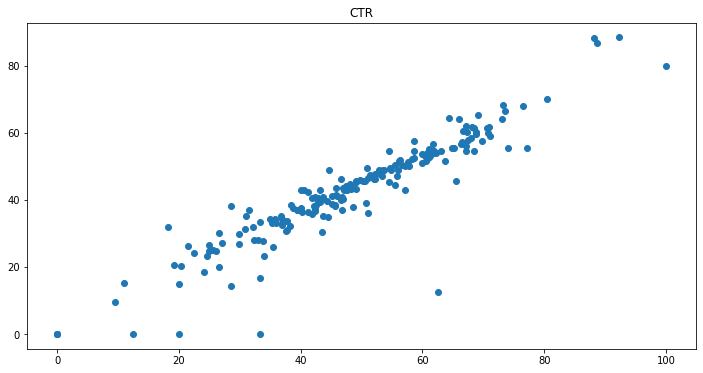

In [ ]:
plot_ctr(ctr_main, ctr_pred)

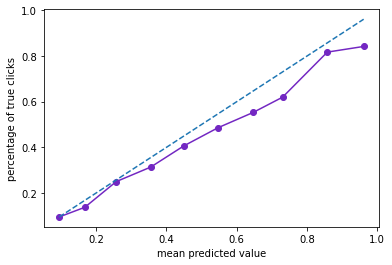

In [ ]:
plot_reliability_diagram_CTR(ctr_main, ctr_pred, 10)

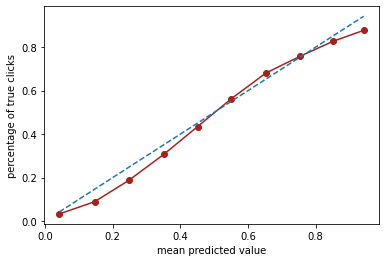

In [ ]:
plot_reliability_diagram_labels(y_over_test, probs[:, 1], 10)

## Results on main test data

In [ ]:
dtest = xgb.DMatrix(test_data.values)
probs_1 = clf_over.predict(dtest)
y_pred_main = [1 if p >= 0.5 else 0 for p in probs_1]
save_result(y_pred_main, "xgboost")

# One-Hot Encoding

In [ ]:
def convert_to_sparse_pandas(df, exclude_columns=[]):
    df = df.copy()
    exclude_columns = set(exclude_columns)
    for (columnName, columnData) in df.iteritems():
        if columnName in exclude_columns:
            continue
        df[columnName] = pd.arrays.SparseArray(columnData.values, dtype='uint8')
    return df

In [ ]:
cols = ['displayId', 'dayOfWeek', 'hourOfDay', 'advertiserId', 'campaignId',
       'creativeId', 'publisher', 'widgetId', 'device', 'os', 'browser',
       'source', 'docId', 'userId', 'Month', 'dayOfMonth']

In [ ]:
data_one_hot_under = pd.get_dummies(df_under, columns=cols, sparse=True)
data_one_hot_under.shape

(271200, 210711)

In [ ]:
data_one_hot_sparse = convert_to_sparse_pandas(data_one_hot_under, exclude_columns=['clicked'])
y_sparse_under = data_one_hot_sparse['clicked']
X_sparse_under = data_one_hot_sparse[data_one_hot_sparse.columns.difference(['clicked'])]

In [ ]:
import scipy
def data_frame_to_scipy_sparse_matrix(df):
    arr = scipy.sparse.lil_matrix(df.shape, dtype=np.float32)
    for i, col in enumerate(df.columns):
        ix = df[col] != 0
        arr[np.where(ix), i] = 1
    return arr.tocsr()

y = np.array(y_sparse_under)
X = data_frame_to_scipy_sparse_matrix(X_sparse_under)

In [ ]:
data_one_hot_test = pd.get_dummies(test_data, columns=cols, sparse=True)
data_one_hot_test.shape

In [ ]:
data_one_hot_sparse = convert_to_sparse_pandas(data_one_hot_test, exclude_columns=['clicked'])
y_sparse_test = data_one_hot_sparse['clicked']
X_sparse_test = data_one_hot_sparse[data_one_hot_sparse.columns.difference(['clicked'])]
X_test_main = data_frame_to_scipy_sparse_matrix(X_sparse_test)

In [ ]:
data_one_hot_over = pd.get_dummies(df_over, columns=cols, sparse=True)
data_one_hot_over.shape

(1258268, 210817)


In [ ]:
data_one_hot_sparse = convert_to_sparse_pandas(data_one_hot_over, exclude_columns=['clicked'])
y_sparse_under = data_one_hot_sparse['clicked']
X_sparse_under = data_one_hot_sparse[data_one_hot_sparse.columns.difference(['clicked'])]
y = np.array(y_sparse_under)
X = data_frame_to_scipy_sparse_matrix(X_sparse_under)

# Factorization Machine

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numba import njit
from tqdm import trange
from sklearn.base import BaseEstimator, ClassifierMixin
import scipy

<div dir='rtl'>
در این قسمت پیاده‌سازی FM موجود است.

In [ ]:
class FactorizationMachineClassifier(BaseEstimator, ClassifierMixin):
 
    def __init__(self, n_iter = 10, n_factors = 2,
                 learning_rate = 0.1, reg_coef = 0.01,
                 reg_factors = 0.01, random_state = 1234):
        self.n_iter = n_iter
        self.reg_coef = reg_coef
        self.n_factors = n_factors
        self.reg_factors = reg_factors
        self.random_state = random_state
        self.learning_rate = learning_rate

    def fit(self, X, y):
        n_samples, n_features = X.shape[0], X.shape[1]
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0
        np.random.seed(self.random_state)
        self.feature_factors_ = np.random.normal(
            scale = 1 / np.sqrt(self.n_factors), size = (self.n_factors, n_features))
        y = y.copy().astype(np.int32)
        y[y == 0] = -1
        loop = range(self.n_iter)
        i = 0
        self.history_ = []
        for _ in loop:
            loss = _sgd_update(X.data, X.indptr, X.indices,y, n_samples, n_features,self.intercept_, self.coef_, self.feature_factors_, self.n_factors,
                               self.learning_rate, self.reg_coef, self.reg_factors)
            self.history_.append(loss)
            print("iter =", i)
            i += 1
        return self

    def probability_predict(self, X):
        
        #X is our sparse matrix 
        pred = self._predict(X)
        pred_proba = 1.0 / (1.0 + np.exp(-pred))
        proba = np.vstack((1 - pred_proba, pred_proba)).T
        return proba

    def _predict(self, X):
       
        linear_output = X * self.coef_
        v = self.feature_factors_.T
        term = (X * v) ** 2 - (X.power(2) * (v ** 2))
        factor_output = 0.5 * np.sum(term, axis = 1)
        return self.intercept_ + linear_output + factor_output

    def predict(self, X):
       
        pred_proba = self.probability_predict(X)[:, 1]
        return pred_proba.round().astype(np.int)

def _sgd_update(data, indptr, indices, y, n_samples, n_features,
                w0, w, v, n_factors, learning_rate, reg_w, reg_v):
    
    print("sgd_update start")
    loss = 0.0
    for i in range(n_samples):
        pred, summed = _predict_instance(data, indptr, indices, w0, w, v, n_factors, i)
        loss += _log_loss(pred, y[i])
        loss_gradient = -y[i] / (np.exp(y[i] * pred) + 1.0)

        w0 -= learning_rate * loss_gradient

        for index in range(indptr[i], indptr[i + 1]):
            feature = indices[index]
            w[feature] -= learning_rate * (loss_gradient * data[index] + 2 * reg_w * w[feature])

        for factor in range(n_factors):
            for index in range(indptr[i], indptr[i + 1]):
                feature = indices[index]
                term = summed[factor] - v[factor, feature] * data[index]
                v_gradient = loss_gradient * data[index] * term
                v[factor, feature] -= learning_rate * (v_gradient + 2 * reg_v * v[factor, feature])
    print("sgd_update end")
    loss /= n_samples
    return loss

def _predict_instance(data, indptr, indices, w0, w, v, n_factors, i):
    summed = np.zeros(n_factors)
    summed_squared = np.zeros(n_factors)
    pred = w0
    for index in range(indptr[i], indptr[i + 1]):
        feature = indices[index]
        pred += w[feature] * data[index]
    for factor in range(n_factors):
        for index in range(indptr[i], indptr[i + 1]):
            feature = indices[index]
            term = v[factor, feature] * data[index]
            summed[factor] += term
            summed_squared[factor] += term * term
        pred += 0.5 * (summed[factor] * summed[factor] - summed_squared[factor])
    return pred, summed

def _log_loss(pred, y):
    return np.log(np.exp(-pred * y) + 1.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
fm = FactorizationMachineClassifier(n_iter = 30, learning_rate = 0.1)
fm.fit(X_train, y_train)

sgd_update start
sgd_update end
iter = 0
sgd_update start
sgd_update end
iter = 1
sgd_update start
sgd_update end
iter = 2
sgd_update start
sgd_update end
iter = 3
sgd_update start
sgd_update end
iter = 4
sgd_update start
sgd_update end
iter = 5
sgd_update start
sgd_update end
iter = 6
sgd_update start
sgd_update end
iter = 7
sgd_update start
sgd_update end
iter = 8
sgd_update start
sgd_update end
iter = 9
sgd_update start
sgd_update end
iter = 10
sgd_update start
sgd_update end
iter = 11
sgd_update start
sgd_update end
iter = 12
sgd_update start
sgd_update end
iter = 13
sgd_update start
sgd_update end
iter = 14
sgd_update start
sgd_update end
iter = 15
sgd_update start
sgd_update end
iter = 16
sgd_update start
sgd_update end
iter = 17
sgd_update start
sgd_update end
iter = 18
sgd_update start
sgd_update end
iter = 19
sgd_update start
sgd_update end
iter = 20
sgd_update start
sgd_update end
iter = 21
sgd_update start
sgd_update end
iter = 22
sgd_update start
sgd_update end
iter = 23
sg

FactorizationMachineClassifier(learning_rate=0.1, n_factors=2, n_iter=30,
                               random_state=1234, reg_coef=0.01,
                               reg_factors=0.01)

In [ ]:
import pickle 
pkl_filename = "/content/mydrive/MyDrive/ML_project/fm.pkl"

def save(model):
  with open(pkl_filename, 'wb') as file:
      pickle.dump(model, file)

def load():
  with open(pkl_filename, 'rb') as file:
      model = pickle.load(file)
  return model

save(fm)

<div dir='rtl'>
همانطور که می‌بینیم loss مدل کاهش می‌یابد که این نشان دهنده ترینینگ موفقیت آمیز است.

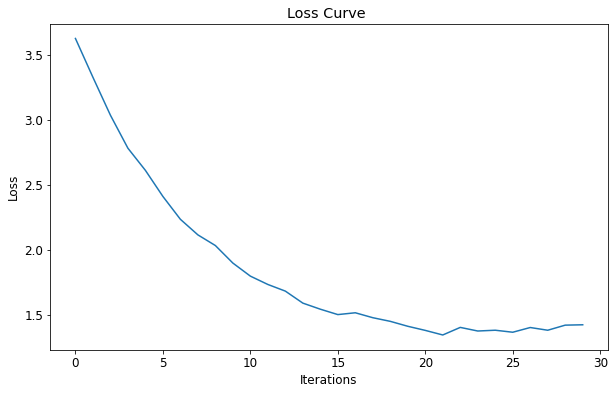

In [ ]:
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 12
plt.plot(fm.history_)
plt.title('Loss Curve ')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
y_pred_prob = fm.probability_predict(X_test)
y_under_pred = [1 if p >= 0.5 else 0 for p in y_pred_prob[:, 1]]
print("F1 measure", F1_measure(y_test, y_under_pred))
print("Cross entropy", cross_entropy(y_test, y_pred_prob))
print("AUC measure", AUC_measure(y_test, y_pred_prob[:, 1]))
print("Accuracy", Accuracy(y_test, y_under_pred))

F1 measure 0.5193109594420215
Cross entropy 0.9425037103237475
AUC measure 0.5255374734085442
Accuracy 0.5193215339233038


In [ ]:
fm = load()
y_pred_prob = fm.probability_predict(X_test_main)
y_fm_pred = [1 if p >= 0.5 else 0 for p in y_pred_prob[:, 1]]
save_result(y_fm_pred, "fm")

In [ ]:
def get_cols(data):
  col_number = dict()
  for i in range(1, len(data.columns)):
    col_name = data.columns[i].split("_")[0]
    if col_name in col_number:
      col_number[col_name][1] = col_number[col_name][1] + 1
    else:
      col_number[col_name] = [i, i]
  return col_number

cols = get_cols(data_one_hot_under)
cols

{'Month': [210695, 210695],
 'advertiserId': [135771, 135966],
 'browser': [139657, 139667],
 'campaignId': [135967, 136410],
 'creativeId': [136411, 138601],
 'dayOfMonth': [210696, 210710],
 'dayOfWeek': [135740, 135746],
 'device': [139651, 139652],
 'displayId': [1, 135739],
 'docId': [140247, 160985],
 'hourOfDay': [135747, 135770],
 'os': [139653, 139656],
 'publisher': [138602, 139017],
 'source': [139668, 140246],
 'userId': [160986, 210694],
 'widgetId': [139018, 139650]}

In [ ]:
def strength_field_pair(data, cols, f1, f2):
  v = fm.feature_factors_
  l1 = cols[f1]
  l2 = cols[f2]
  face = 0
  denominator = 0
  for x in range(l1[0], l1[1]+1):
    for y in range(l2[0], l2[1]+1):
      a = data[[data.columns[x], data.columns[y]]].value_counts()
      if len(a) < 4:
        tmp = 0
      else:
        tmp = a[1][1]
      denominator += tmp
      face += (tmp * (v[0][x] * v[0][y] + v[1][x] * v[1][y]))
  return face/denominator


col_names = list(cols.keys())
col_names.remove('displayId')
col_names.remove('docId')
col_names.remove('userId')
interaction_strength = np.zeros((len(col_names), len(col_names)))
for k1 in range(len(col_names)):
  for k2 in range(k1+1, len(col_names)):
    print(k1, k2)
    interaction_strength[k1][k2] = strength_field_pair(data_one_hot_under, cols, col_names[k1], col_names[k2])
    interaction_strength[k2][k1] = interaction_strength[k1][k2]

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
2 3
2 4


KeyboardInterrupt: ignored

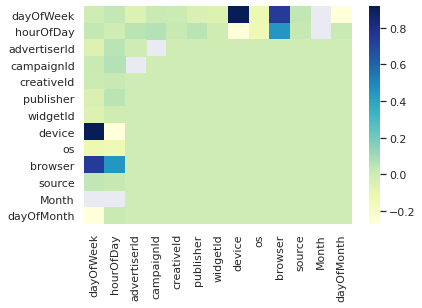

In [ ]:
import seaborn as sns; sns.set_theme()
sns.heatmap(pd.DataFrame(interaction_strength, columns=col_names, index=col_names), cmap="YlGnBu")

<div dir='rtl'>
متاسفانه به دلیل کمبود وقت نتوانستیم این قسمت را کامل اجرا بگیریم. پس هیت مپ را تا جایی که اجرا شده بود کشیدیم. در صورتی که سلول قبل که اجرای آن متوقف شده است را به طور کامل اجرا کنید هیت مپ اصلی را می‌بینید.
<br>
همانطور که می‌بینیم تا اینجای کار مقدار interaction بین فیلد dayOfWeek و فیلد device و browser و همچنین interaction بین فیلد hourOfDay و browser نیز زیاد است.

# Analysis and Results

<div dir='rtl'>
با توجه به نتایج به دست آمده از مدل ها بهترین مدلی که ما به دست آوردیم Random Forest آموزش داده شده با داده‌های over sample شده و پارامتر‌های تعداد درخت = ۵۰ و عمق درخت = ۲۵ بوده است که Accuracy حدود ۸۷ درصد روی داده‌های تست به ما داد.<br>
دومین بهترین مدلی که به دست آوردیم XGBoost آموزش داده شده روی داده‌های over sample بود که Accuracy ۸۰ درصد را روی داده‌های تست به ما داد. <br>
پس از این دو مدل در رده سوم Random Forest و XGBoost آموزش داده ‌‌شده روی داده‌های under sample قرار می‌گیرند گه accuracy حدود ۶۰ درصدی روی داده‌های تست به ارمغان آوردند. <br>
در رده آخر دو مدل linear regression و linear svm قراار دارند که دقت حدود ۵۱-۵۲ درصد را روی داده‌های تست به ارمغان آورده اند. (البته به دلیل طولانی بودن زمان ران شدن مدل svm نتوانستیم بهترین پارامتر‌های آن را با دیتای over sample به دست آوریم.) <br>
در نهایت مدل factorization machine را داریم. این مدل را روی داده‌های under sample آموزش داده و مدل به دقت ۵۱ درصد روی داده‌های تست رسید. تعداد factor های این مدل را برابر با ۲ قرار دادیم. <br>

<div dir='rtl'>
به طور کلی نتیجه مشاهدات و بررسی های ما روی این دیتاست به شرح زیر است:
<ul>
  <li>
  از تمامی فیچر ها جهت آموزش مدل‌ها استفاده شود.
  </li>
  <li>
  بهترین مدل‌های به دست آمده Random Forest و  XGBoost آموزش داده‌ شده روی داد‌های oversample شده با پارامتر‌های به دست آمده هستند.
  </li>
  <li>
  Factorization machine با تعداد factor برابر با ۲ بهبودی در معیارهای ارزیابی ایجاد نکرد ولی ممکن است درصورت تغییر تعداد factor ها یا تغییر دیتای training از under sample به over sample نتیجه بهتری حاصل شود. 
  </li>
</ul>